## PREDICTING WIND TURBINE POWER OUTPUT FROM WIND SPEED VALUES 
## using LINEAR REGRESSION

#### Objectives
##### 1 Perform linear regression on the dataset.
##### 2 Explain what this shows.
##### 3 Predict wind speed power output from wind speed values.

#### SOURCES

https://www.w3schools.com/python/python_ml_linear_regression.asp
    
https://realpython.com/linear-regression-in-python/#regression
    
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

    

In [1]:
# importing library and dataset.
import pandas as pd

dfpower = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

# examining what type is our data.
dfpower.dtypes


speed    float64
power    float64
dtype: object

In [2]:
# looking at the heads and ends of dataset.
print(dfpower)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


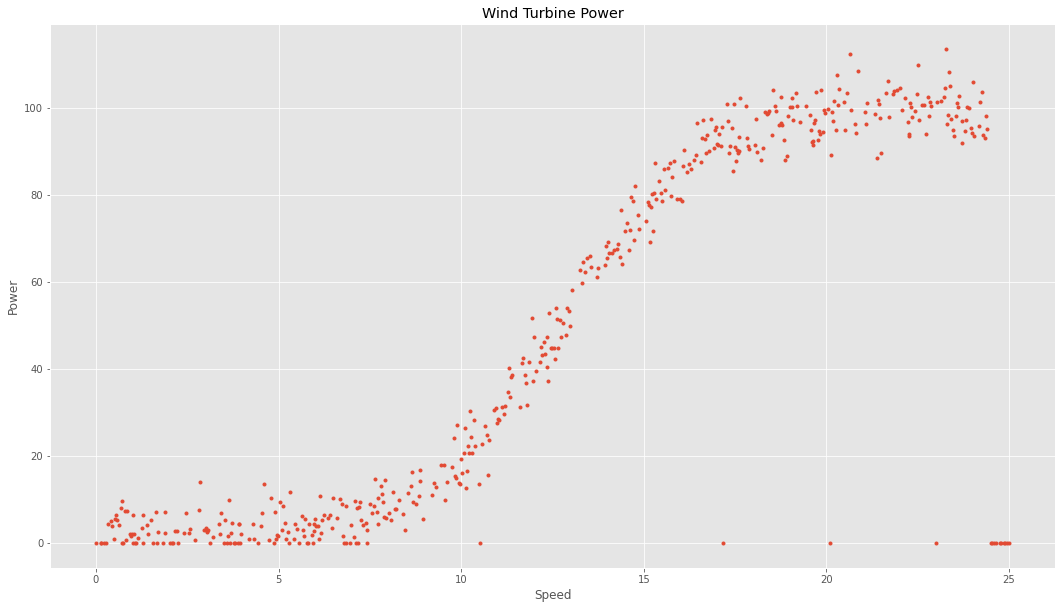

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# x = speed, y= power
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# plot each (x,y) dot on graph.
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,10)
plt.title("Wind Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x, y, '.')

In [4]:
# import library
from sklearn.linear_model import LinearRegression

# x = speed and y = power from the dataframe dfpower
x = dfpower.iloc[:,[0]]
y = dfpower.iloc[:,[1]]

# create the variable model as the instance of LinearRegression
model=LinearRegression()

# call .fit on the model which calculates the optimal values of the 
# weights bo (the intercept of the y axis) and b1 (slope of the estimated
# regression line)
model.fit(x,y)

# r_sq is the proportion of the variance for a dependent variable that may
# be explained by the influence of independent variable(s)
# calling .score returns the coefficient of determination (r_sq)
r_sq = model.score(x,y)

# the closer the coefficient of determination is to 1 the better the fit,
# because it indicates a sum of squared residuals (SSR) is 0 which is perfect. 
print("coefficient of determination:", r_sq)

# .intercept is the intercept of y axis, bo
print("intercept:", model.intercept_)

# .coef is the slope of regression line, b1.
print("slope:", model.coef_)

coefficient of determination: 0.7289360258564073
intercept: [-13.89990263]
slope: [[4.91759567]]


In [5]:
# we can now use the y intercept and the slope multiplied by each value
# of x in turn to predict y (y_pred)
y_pred = model.intercept_+ model.coef_ * x
print("predicted response:",y_pred)

predicted response:           speed
0    -13.899903
1    -13.285203
2    -13.162263
3    -12.793444
4    -12.547564
..          ...
495  107.933530
496  108.302350
497  108.425290
498  108.794109
499  109.039989

[500 rows x 1 columns]


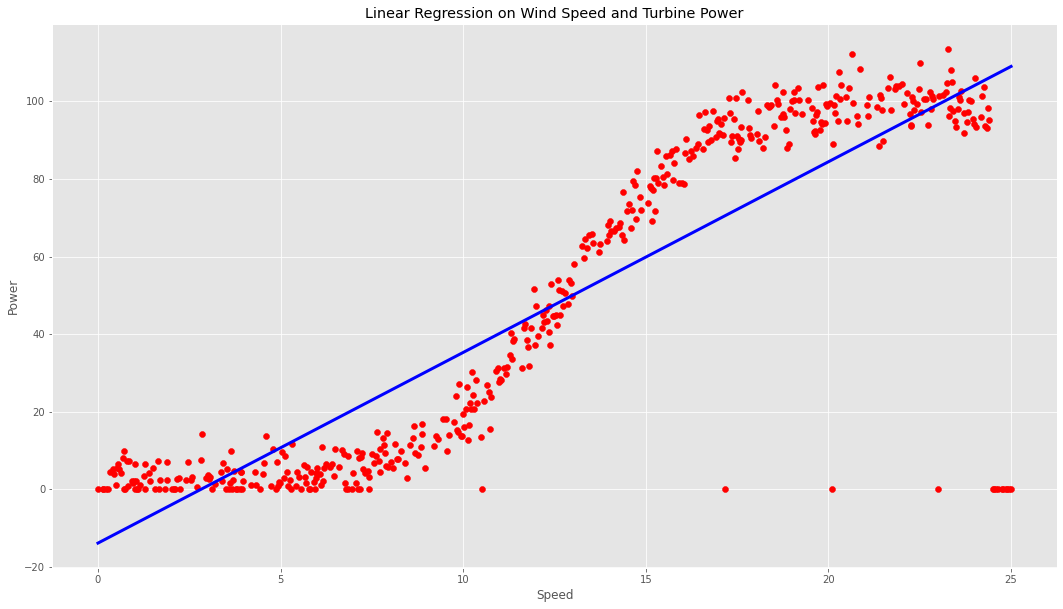

In [6]:

# Plot outputs of the x and y values as red dots and the x and y_pred
# as a blue line.
plt.scatter(x, y,  color='red')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.title("Linear Regression on Wind Speed and Turbine Power")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()